Use only python and basic libraries such as numpy,pandas,matplotlib to implement the following.

In [88]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/mabhay3420/Deep-Into-CNN/master/Datasets/diabetes2.csv'
df1 = pd.read_csv(url)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

In [90]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [91]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for j in range(0, epochs):
      h = hypothesis(X, theta)
      if j%1000 == 0:
        print("Epoch",j,"---loss",J[j])
      for i in range(0, len(X.columns)):
          theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
      J.append(cost(X, y, theta))
    return J, theta

In [92]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [93]:
X = df1
y= df1["Outcome"]

In [101]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 50000)

Epoch 0 ---loss 10.493551891331172


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1000 ---loss 0.9626904650732417
Epoch 2000 ---loss 0.6253469548675642
Epoch 3000 ---loss 0.5626712894048418
Epoch 4000 ---loss 0.5436554885259288
Epoch 5000 ---loss 0.5324121266670622
Epoch 6000 ---loss 0.5236053163647395
Epoch 7000 ---loss 0.5161618810809947
Epoch 8000 ---loss 0.5097407433359578
Epoch 9000 ---loss 0.5041433532722239
Epoch 10000 ---loss 0.49921277638284406
Epoch 11000 ---loss 0.4948174031920405
Epoch 12000 ---loss 0.4908476700900892
Epoch 13000 ---loss 0.48721396896274716
Epoch 14000 ---loss 0.48384424869042153
Epoch 15000 ---loss 0.4806814140666563
Epoch 16000 ---loss 0.47768076866397513
Epoch 17000 ---loss 0.474807671962832
Epoch 18000 ---loss 0.472035496471088
Epoch 19000 ---loss 0.4693439094401315
Epoch 20000 ---loss 0.4667174661734026
Epoch 21000 ---loss 0.46414448212485687
Epoch 22000 ---loss 0.46161614312112365
Epoch 23000 ---loss 0.4591258124142744
Epoch 24000 ---loss 0.4566684965505843
Epoch 25000 ---loss 0.4542404370567149
Epoch 26000 ---loss 0.45183880

In [102]:
print("Final accuracy: ", acc)

Final accuracy:  0.8841145833333334


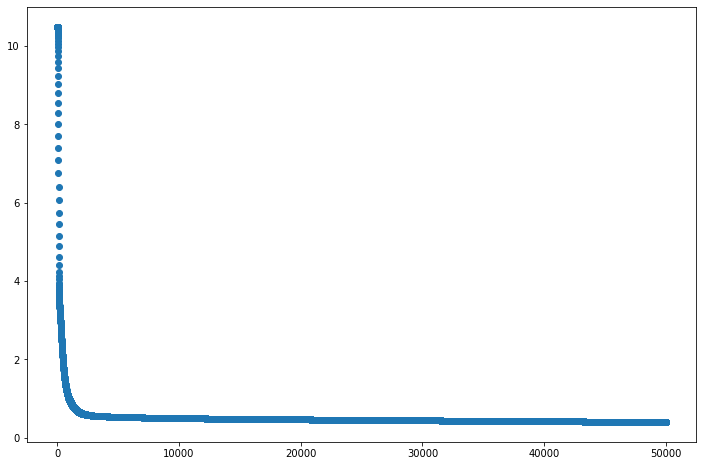

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()